### [n^2 배열 자르기](https://school.programmers.co.kr/learn/courses/30/lessons/87390)

In [ ]:
solution = lambda n, left, right: [max(divmod(x, n))+1 for x in range(left, right+1)]

### [튜플](https://school.programmers.co.kr/learn/courses/30/lessons/64065?language=python3)

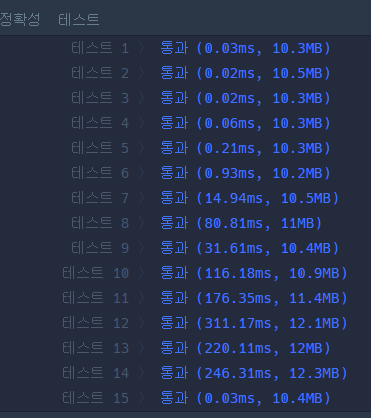

In [3]:
def solution(s):
    s = s[2:-2].split("},{")
    target = sorted([(len(x), x) for x in s], key=lambda x: x[0])
    answer = []
    for _, t in target:
        t = t.split(',')
        for a in answer:
            t.remove(a)
        answer.append(t[0])
    return [int(x) for x in answer]

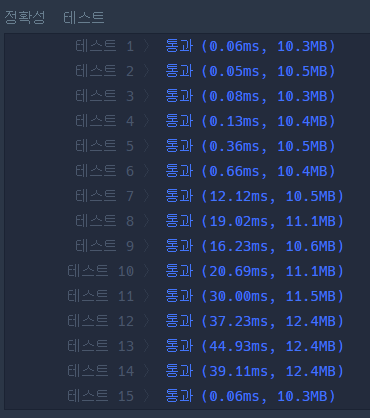

In [1]:
"""
Counter 끼리의 차집합을 이용
"""

from collections import Counter

def solution(s):
    s = s[2:-2].split("},{")
    target = sorted([(len(x), x) for x in s], key=lambda x: x[0])
    answer = []
    before = Counter()
    for _, t in target:
        t = t.split(',')
        cur = Counter(t)
        new = cur - before
        answer.append(int(list(new.keys())[0]))
        before = cur
    return answer

In [4]:
s = "{{2},{2,1},{2,1,3},{2,1,3,2}}"
solution(s)

[2, 1, 3, 2]